<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part4_P93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IQR 방법

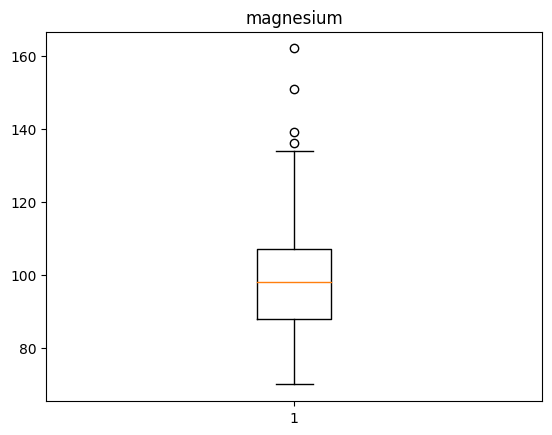

In [49]:
# 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)

# Wine 데이터에서 magnesium 컬럼의 박스 플롯
plt.boxplot(wine['magnesium'], whis=1.5)
plt.title('magnesium')
plt.show()

## 이상치 인덱스와 값 뽑아오기

In [50]:
import numpy as np

def outliers_iqr(data, column):
  quartile_1, quartile_3 = np.percentile(data[column],[25, 75])
  iqr = quartile_3 - quartile_1
  lower_whis = quartile_1 - (iqr * 1.5)
  upper_whis = quartile_3 + (iqr * 1.5)
  outliers = data[(data[column] > upper_whis) | (data[column] < lower_whis)]
  return outliers[[column]]

outliers = outliers_iqr(wine, 'magnesium')
display(outliers)

,magnesium
69,151.0
73,139.0
78,136.0
95,162.0


## 이상치 정제하기

In [51]:
# 이상치 제거하기
drop_outliers = wine.drop(index=outliers.index)

# 이상치 제거 전과 후의 데이터 shape
print('Original :', wine.shape)               # Original : (178, 13)
print('Drop Outliers :', drop_outliers.shape) # Drop Outliers : (174, 13)

Original : (178, 13)
Drop Outliers : (174, 13)


In [52]:
# 이상치 대체하기
## 이상치를 NaN으로 변경
wine2 = wine.copy()
wine2.loc[outliers.index, 'magnesium'] = np.NaN

## NaN이 된 이상치를 평균값으로 변경
wine2['magnesium'] = wine2['magnesium'].fillna(wine2['magnesium'].mean())
display(wine2.loc[outliers.index, 'magnesium'])   # 69, 73, 78, 95

,magnesium
69,98.655172
73,98.655172
78,98.655172
95,98.655172


# 표준점수 방법

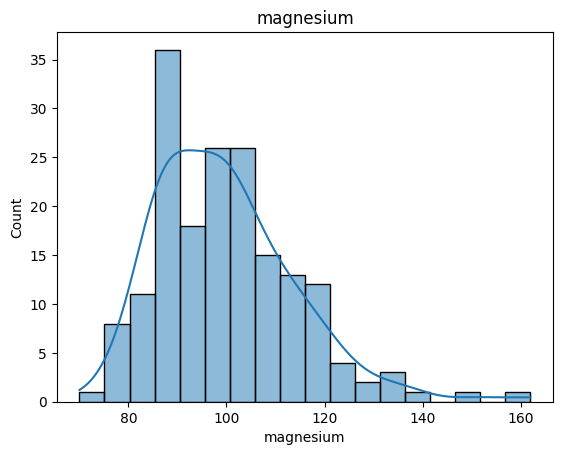

In [59]:
# 데이터 불러오기
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)

# Wine 데이터에서 magnesium 컬럼의 박스 플롯
# plt.hist(wine['magnesium'], bins=18)
# plt.title('magnesium')
# plt.show()

# Wine 데이터에서 magnesium 컬럼의 박스 플롯 (seaborn 플롯)
sns.histplot(wine['magnesium'], bins=18, kde=True)
plt.title('magnesium')
plt.show()

In [60]:
from scipy.stats import zscore
wine3 = wine.copy()
wine3['z_score'] = zscore(wine3['magnesium'])
outliers = wine3[(wine3['z_score'] > 3) | (wine3['z_score'] < -3)]
display(outliers[['magnesium', 'z_score']])   # 69, 95

,magnesium,z_score
69,151.0,3.599025
95,162.0,4.371372


In [58]:
# z_score 컬럼 제거하기
wine3 = wine3.drop('z_score', axis=1)

# 이상치 제거하기
drop_outliers = wine3.drop(index=outliers.index)

# 이상치 제거 전과 후의 데이터 shape
print('Original :', wine3.shape)               # Original : (178, 13)
print('Drop Outliers :', drop_outliers.shape) # Drop Outliers : (176, 13)

Original : (178, 13)
Drop Outliers : (176, 13)


In [61]:
# 이상치 대체하기
## 이상치를 NaN으로 변경
wine4 = wine.copy()
wine4.loc[outliers.index, 'magnesium'] = np.NaN

## NaN이 된 이상치를 평균값으로 변경
wine4['magnesium'] = wine4['magnesium'].fillna(wine4['magnesium'].mean())
display(wine4.loc[outliers.index, 'magnesium'])   # 69, 95

,magnesium
69,99.096591
95,99.096591
